In [1]:
import pandas as pd
import numpy as np

In [7]:
n = np.random.random((3*100))
out = np.argmin(n.reshape((-1,3)), axis=1)

print(n.shape)
print(out.shape)

(300,)
(100,)


In [9]:
df = pd.read_clipboard()

In [12]:
df

,Date,Attributes,Symbols,value
11/12/2019,Adj,Close,AALR3.SA,18.001.112
11/12/2019,Adj,Close,ABCB4.SA,18.298.676
11/12/2019,Adj,Close,ABEV3.SA,17.977.827
12/12/2019,Adj,Close,AALR3.SA,18.211.111
12/12/2019,Adj,Close,ABCB4.SA,18.653.500
12/12/2019,Adj,Close,ABEV3.SA,18.005.134
13/12/2019,Adj,Close,AALR3.SA,18.100.537
13/12/2019,Adj,Close,ABCB4.SA,18.153.353
13/12/2019,Adj,Close,ABEV3.SA,18.369.147


In [14]:
grouped_dfs = [i[1] for i in df.groupby("Symbols")]

for i in grouped_dfs:
    print(i)
    print(' ')

           Date Attributes   Symbols       value
11/12/2019  Adj      Close  AALR3.SA  18.001.112
12/12/2019  Adj      Close  AALR3.SA  18.211.111
13/12/2019  Adj      Close  AALR3.SA  18.100.537
 
           Date Attributes   Symbols       value
11/12/2019  Adj      Close  ABCB4.SA  18.298.676
12/12/2019  Adj      Close  ABCB4.SA  18.653.500
13/12/2019  Adj      Close  ABCB4.SA  18.153.353
 
           Date Attributes   Symbols       value
11/12/2019  Adj      Close  ABEV3.SA  17.977.827
12/12/2019  Adj      Close  ABEV3.SA  18.005.134
13/12/2019  Adj      Close  ABEV3.SA  18.369.147
 


In [19]:
from timeit import repeat

In [15]:
import pandas as pd
import numpy as np

N_samples = int(1e4)
N_nan = N_var = int(0.02 * N_samples)

# Generate random data
data = np.random.rand(N_samples,2) * [30, 360]
data[np.random.choice(N_samples, N_nan), 1] = np.nan
data[np.random.choice(N_samples, N_var), 1] = 990

# Create dataset
df = pd.DataFrame(data, columns=['WindSpeed', 'WindDir'])
df.index = pd.date_range(start='2000-01-01 00:00', periods=N_samples, freq='10min')

In [16]:
df

,WindSpeed,WindDir
2000-01-01 00:00:00,16.167381,311.476589
2000-01-01 00:10:00,18.632436,115.963904
2000-01-01 00:20:00,14.651068,188.463389
2000-01-01 00:30:00,7.614744,266.786817
2000-01-01 00:40:00,27.359652,201.191199
...,...,...
2000-03-10 09:50:00,25.157903,155.537917
2000-03-10 10:00:00,6.882836,46.315722
2000-03-10 10:10:00,1.121534,232.981244
2000-03-10 10:20:00,24.099449,180.825520


In [17]:
def meandir(x):
    '''
    Parameters
    ----------
    x : pandas.Series
        pandas series to be averaged

    Returns
    -------
    float
        averaged wind direction
    '''

    # Removes the NaN from the recording
    x = x.dropna()

    # If the record is empty, return NaN
    if len(x)==0:
        return np.nan

    # If the record contains variable samples (990) return variable (990)
    elif np.any(x == 990):
        return 990

    # Otherwise sum the vectors and return the angle
    else:
        angle = np.rad2deg(
                           np.arctan2(
                                   np.sum(np.sin(np.deg2rad(x))),
                                   np.sum(np.cos(np.deg2rad(x)))
                                     )
                          )

        #Wrap angles from (-pi,pi) to (0,360)
        return (angle + 360) % 360

In [20]:
grouped = df.groupby(pd.Grouper(freq='H'))   # Data from 14.30 to 15.29 are rounded to 15.00
aggfuns1 = {'WindSpeed': np.mean, 'WindDir':meandir}
aggfuns2 = {'WindSpeed': np.mean, 'WindDir':np.mean}

res = repeat(stmt='grouped.agg(aggfuns1)', globals=globals(), number=1, repeat=10)
print(f'With custom aggregating function {min(res)*1000:.2f} ms')

res = repeat(stmt='grouped.agg(aggfuns2)', globals=globals(), number=1, repeat=10)
print(f'Without custom aggregating function {min(res)*1000:.2f} ms')

With custom aggregating function 1175.76 ms
Without custom aggregating function 1.65 ms


,WindSpeed,WindDir
2000-01-01 00:00:00,16.167381,311.476589
2000-01-01 00:10:00,18.632436,115.963904
2000-01-01 00:20:00,14.651068,188.463389
2000-01-01 00:30:00,7.614744,266.786817
2000-01-01 00:40:00,27.359652,201.191199
...,...,...
2000-03-10 09:50:00,25.157903,155.537917
2000-03-10 10:00:00,6.882836,46.315722
2000-03-10 10:10:00,1.121534,232.981244
2000-03-10 10:20:00,24.099449,180.825520


In [35]:
set([i[1].shape for i in df.dropna().groupby(pd.Grouper(freq='H'))])

{(4, 2), (5, 2), (6, 2)}

In [22]:
pd.Grouper()

,WindSpeed,WindDir
2000-01-01 00:00:00,16.167381,311.476589
2000-01-01 00:10:00,18.632436,115.963904
2000-01-01 00:20:00,14.651068,188.463389
2000-01-01 00:30:00,7.614744,266.786817
2000-01-01 00:40:00,27.359652,201.191199
...,...,...
2000-03-10 09:50:00,25.157903,155.537917
2000-03-10 10:00:00,6.882836,46.315722
2000-03-10 10:10:00,1.121534,232.981244
2000-03-10 10:20:00,24.099449,180.825520


In [21]:
grouped.agg(aggfuns1)

,WindSpeed,WindDir
2000-01-01 00:00:00,14.238001,243.646108
2000-01-01 01:00:00,15.045553,129.394194
2000-01-01 02:00:00,15.771692,990.000000
2000-01-01 03:00:00,18.017857,104.745571
2000-01-01 04:00:00,17.057802,283.872748
...,...,...
2000-03-10 06:00:00,17.263978,125.068872
2000-03-10 07:00:00,19.444256,111.211559
2000-03-10 08:00:00,19.298598,332.423324
2000-03-10 09:00:00,16.144978,213.599011


/Users/akshay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/akshay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


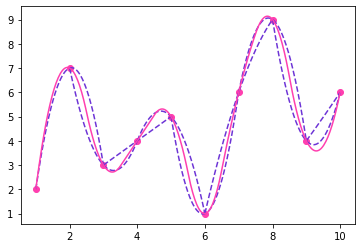

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# original data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 7, 3, 4, 5, 1, 6, 9, 4, 6]

# quadratic regression
for i in range(int((len(x) + len(y)) / 2)):
    sub_x = x[i:i+3]
    sub_y = y[i:i+3]
    
    model = np.poly1d(np.polyfit(sub_x, sub_y, 2))
    polyline = np.linspace(min(sub_x), max(sub_x), 200)
    plt.plot(polyline, model(polyline), color="#6D34D6", linestyle='dashed')


#Interpolate
x_new = np.linspace(min(x), max(x), 300)  
f = interp1d(x, y, kind='quadratic')

# plot lines
plt.scatter(x, y, color='#FF3FAF')
plt.plot(x_new,f(x_new), color='#FF3FAF', linestyle='solid')
plt.show()

ImportError: cannot import name 'spline' from 'scipy.interpolate' (/Users/akshay/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/__init__.py)

In [72]:
tf.__version__

'2.3.1'

In [116]:
import tensorflow as tf

a = np.random.random((25, 1010, 7, 512))
b = np.random.random((10, 7))

A = tf.convert_to_tensor(a)
B = tf.convert_to_tensor(b)

out = tf.concat([A[:,:10,:,:] + B[None, :, :, None], A[:,10:,:,:]], axis=1)
out.shape

TensorShape([25, 1010, 7, 512])

In [109]:
(A[:,:10,:,:] + B[None, :, :, None]).shape

TensorShape([25, 10, 7, 512])

In [64]:
tf.stack()

In [117]:
a[:,:10,:,:] += b[None,:,:,None]

tf.reduce_all(tf.convert_to_tensor(a) == out).

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [101]:
%%timeit

M, N = 1001, 1001
u = 100
v = 200
sin_img = np.zeros((M, N))
for m in range(M):
    for n in range(N):
        sin_img[m, n] = np.sin((2 * np.pi * u * m / M) + (2 * np.pi * v * n / N))

1.28 s ± 51.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [105]:
%%timeit

idx_sin_img = np.stack(np.indices((M,N)), axis=-1) #(1001,1001,2)
out = np.sin((2 * np.pi * u * idx_sin_img[...,0] / M) + 
             (2 * np.pi * v * idx_sin_img[...,1] / N))

out.shape

24.4 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [103]:
%%timeit

sin_img = np.array([[np.sin((2 * np.pi * u * m / M) + (2 * np.pi * v * n / N))
    for n in range(N)]
    for m in range(M)])

1.44 s ± 68.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
out.shape

(1001, 1001)

In [74]:
M

1001

In [75]:
N

1001

In [77]:
sin_img.shape

(1001, 1001)

In [78]:
np.sin((2 * np.pi * u * m / M) + (2 * np.pi * v * n / N))

-0.9516367311568238

In [80]:
sin_img = np.zeros((M, N))

In [166]:
a

array([[1, 2, 3, 4, 2, 5],
       [4, 5, 6, 7, 8, 9],
       [2, 5, 1, 3, 2, 5],
       [0, 4, 0, 4, 0, 4],
       [0, 3, 1, 7, 2, 4]])

In [165]:
a.strides

(48, 8)

In [167]:
a.shape

(5, 6)

In [175]:
shape = (5,3,6)

In [176]:
strides = (a.strides[0], a.strides[1]*2, a.strides[1])

In [178]:
np.lib.stride_tricks.as_strided(a, shape, strides)[0]

array([[1, 2, 3, 4, 2, 5],
       [3, 4, 2, 5, 4, 5],
       [2, 5, 4, 5, 6, 7]])

In [ ]:
[1,2, 3,4, 2,5],  
[1,2, 2,5, 3,4],  
[3,4, 1,2, 2,5],  
[3,4, 2,5, 1,2],  
[2,5, 1,2, 3,4], and 
[2,5, 3,4, 1,2]

In [194]:
import numpy as np

a = np.array([[1,2,  3,4,  2,5], 
              [4,5,  6,7,  8,9],
              [2,5,  1,3,  2,5],
              [0,4,  0,4,  0,4],
              [0,3,  1,7,  2,4]])

b = a[:,[4,5,2,3,0,1]]

np.hstack([a,
           np.roll(b, 2, axis=1),
           np.roll(b, 4, axis=1),           
           np.roll(a, 4, axis=1),
           np.roll(a, 2, axis=1),  
           b]).reshape(5,-1,6)

array([[[1, 2, 3, 4, 2, 5],
        [1, 2, 2, 5, 3, 4],
        [3, 4, 1, 2, 2, 5],
        [3, 4, 2, 5, 1, 2],
        [2, 5, 1, 2, 3, 4],
        [2, 5, 3, 4, 1, 2]],

       [[4, 5, 6, 7, 8, 9],
        [4, 5, 8, 9, 6, 7],
        [6, 7, 4, 5, 8, 9],
        [6, 7, 8, 9, 4, 5],
        [8, 9, 4, 5, 6, 7],
        [8, 9, 6, 7, 4, 5]],

       [[2, 5, 1, 3, 2, 5],
        [2, 5, 2, 5, 1, 3],
        [1, 3, 2, 5, 2, 5],
        [1, 3, 2, 5, 2, 5],
        [2, 5, 2, 5, 1, 3],
        [2, 5, 1, 3, 2, 5]],

       [[0, 4, 0, 4, 0, 4],
        [0, 4, 0, 4, 0, 4],
        [0, 4, 0, 4, 0, 4],
        [0, 4, 0, 4, 0, 4],
        [0, 4, 0, 4, 0, 4],
        [0, 4, 0, 4, 0, 4]],

       [[0, 3, 1, 7, 2, 4],
        [0, 3, 2, 4, 1, 7],
        [1, 7, 0, 3, 2, 4],
        [1, 7, 2, 4, 0, 3],
        [2, 4, 0, 3, 1, 7],
        [2, 4, 1, 7, 0, 3]]])

array([[2, 5, 3, 4, 1, 2],
       [8, 9, 6, 7, 4, 5],
       [2, 5, 1, 3, 2, 5],
       [0, 4, 0, 4, 0, 4],
       [2, 4, 1, 7, 0, 3]])

In [200]:
a

array([[1, 2, 3, 4, 2, 5],
       [4, 5, 6, 7, 8, 9],
       [2, 5, 1, 3, 2, 5],
       [0, 4, 0, 4, 0, 4],
       [0, 3, 1, 7, 2, 4]])

In [202]:
df = pd.read_clipboard('\s\s+')

In [214]:
df['properties'].apply(lambda x: [(k,v) for k,v in x.items()])

AttributeError: 'str' object has no attribute 'items'

In [222]:
list1 = [ "a", 
          "b", 
          "c" ]
list2 = [ "e", 
          "f",
          "g" ]


[['a', 'e'], ['b', 'f'], ['c', 'g']]

In [226]:
try:
    [2 * x  if x > 1 else 0 for x in [1,2,3]]
except SyntaxError:
    print("Why isn't this printed?")

In [228]:
try:
    eval("[2 * x for x in [1,2,3] if x > 1 else 0]") #<----
except SyntaxError:
    print("Why isn't this printed?")

Why isn't this printed?


In [229]:
import numpy as np

def get_path(Z):
    start = (1,1)
    goal = (-2,-2)
    
    G = np.zeros(Z.shape)
    G_gamma = np.zeros(G.shape)
    G[start] = 1000
    
    break_counter = 0
    longest_possible_path = np.max(Z.shape)*(int(np.min(Z.shape)/2)+1)+(int(np.min(Z.shape)/2)+1)
    
    while G[goal] == 0 and break_counter<longest_possible_path:
        break_counter+=1
        G_gamma = np.subtract(G, 1)
        N = G_gamma[0:-2,1:-1]
        W = G_gamma[1:-1,0:-2]
        C = G[1:-1,1:-1]
        E = G_gamma[1:-1,2:]
        S = G_gamma[2:,1:-1]
        G[1:-1,1:-1] = Z[1:-1,1:-1]*np.maximum.reduce([N,S,E,W,C])
    
    if G[goal] != 0:
        num_steps = int(1000 - G[goal] + 1)
    else:
        num_steps = Z.shape[0]*Z.shape[1]
    return num_steps

def solution(map):
    maze = (np.pad(map, 1, mode='constant', constant_values=1)==0).astype(int)
    best_run = get_path(maze)
    walls = np.argwhere(map)+1

    for i in walls:
        maze[tuple(i)]=1
        p = get_path(maze)
        if p<best_run:
            best_run=p
        maze[tuple(i)]=0
    
    return best_run

In [232]:
a = np.arange(9)
print([i for i in a])

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [233]:
a = [[1, 2, 3], 
     [4, 5, 6],
     [7, 8, 9]]

In [257]:
import numpy as np

d1 = np.diag(np.array(a))
d2 = np.diag(np.flip(np.array(a), axis=1))

print(d1)
print(d2)

[1 5 9]
[3 5 7]


In [259]:
d1 = [a[i][i] for i in range(len(a))]
d2 = [a[i][j] for i,j in enumerate(reversed(range(len(a[0]))))]
print(d1)
print(d2)

[1, 5, 9]
[3, 5, 7]


In [261]:
d1 = []
d2 = []

for i,j in enumerate(reversed(range(len(a[0])))):
    d1.append(a[i][i])
    d2.append(a[i][j])
    
print(d1)
print(d2)

[1, 5, 9]
[3, 5, 7]


array([3, 5, 7])

array([1, 5, 9])